<a href="https://colab.research.google.com/github/sumantsharma16/Deep-learning/blob/sumantsharma16-machinelearning/ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 1.7 MB 49.2 MB/s 
     |████████████████████████████████| 5.9 MB 51.9 MB/s 
     |████████████████████████████████| 438 kB 57.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# divide the dataset into dependent and independet features
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [7]:
print(x)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [8]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [9]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
# Feature enginerring 
geography=pd.get_dummies(x['Geography'])

In [11]:

geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [12]:
geography=pd.get_dummies(x['Geography'], drop_first=True)

In [13]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [14]:
gender=pd.get_dummies(x['Gender'], drop_first=True)

In [15]:
# concatinate these variable with dataframe
x = x.drop(['Geography', 'Gender'], axis=1)

In [16]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [17]:
from numpy.core.function_base import geomspace
x = pd.concat([x,geography, gender],axis=1)

In [18]:
# splitting the dataset into training and testset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [19]:
x.shape

(10000, 11)

In [20]:
x_train.shape, x_test.shape

((8000, 11), (2000, 11))

In [21]:
# feature sclaing


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [22]:
x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [23]:
x_train

array([[ 1.34111823,  0.38693948, -1.73661451, ..., -0.57965968,
        -0.58042949, -1.08948952],
       [-1.4670728 , -0.57127623,  0.69033796, ..., -0.57965968,
        -0.58042949,  0.91786105],
       [-0.19155746, -1.62531351, -0.69649202, ..., -0.57965968,
        -0.58042949, -1.08948952],
       ...,
       [ 0.5079187 ,  1.44097676, -0.69649202, ...,  1.72515018,
        -0.58042949, -1.08948952],
       [-2.25912668, -0.76291937, -0.00307703, ..., -0.57965968,
        -0.58042949,  0.91786105],
       [-0.78816947,  1.05769048, -1.73661451, ..., -0.57965968,
         1.72286214,  0.91786105]])

In [24]:
x_test

array([[-0.17098463, -1.3378488 , -1.38990701, ..., -0.57965968,
        -0.58042949,  0.91786105],
       [ 2.06116722, -0.18798994, -0.34978452, ..., -0.57965968,
         1.72286214,  0.91786105],
       [ 0.52849152,  0.48276105,  0.69033796, ..., -0.57965968,
        -0.58042949,  0.91786105],
       ...,
       [-0.91160644, -1.05038408,  0.34363047, ..., -0.57965968,
         1.72286214,  0.91786105],
       [-1.29220376, -0.95456251,  1.38375295, ...,  1.72515018,
        -0.58042949,  0.91786105],
       [ 1.00166657,  0.19529634, -0.00307703, ..., -0.57965968,
        -0.58042949,  0.91786105]])

In [25]:
x_train.shape

(8000, 11)

## Part 2:  Now lets create ANN

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU
from tensorflow.keras.layers import Dropout

In [27]:
## lets initialize the ANN
classifier = Sequential()

In [28]:
# Adding the input layers
classifier.add(Dense(units=11,activation='relu'))

In [60]:
## Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [75]:
# Adding second Hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [76]:
# Adding the out put layer
classifier.add(Dense(1,activation='sigmoid'))

In [77]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [79]:
## Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [66]:
from keras.callbacks import EarlyStopping
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5462 - accuracy: 0.7867 - val_loss: 0.5028 - val_accuracy: 0.8042
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.5139 - accuracy: 0.7867 - val_loss: 0.4641 - val_accuracy: 0.8042
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4693 - accuracy: 0.7867 - val_loss: 0.4404 - val_accuracy: 0.8042
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4564 - accuracy: 0.7867 - val_loss: 0.4350 - val_accuracy: 0.8042
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4540 - accuracy: 0.7867 - val_loss: 0.4376 - val_accuracy: 0.8042
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4519 - accuracy: 0.7867 - val_loss: 0.4349 - val_accuracy: 0.8042
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4569 - accuracy: 0.7867 - val_loss: 0.4283 - val_accuracy:

In [67]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

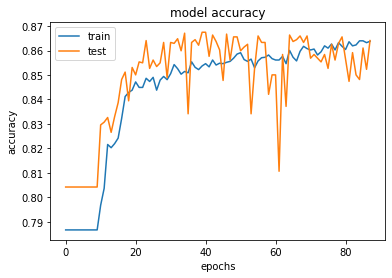

In [68]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

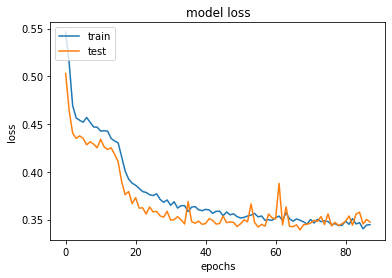

In [69]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
## Part 3 : Making prediction and evaluating the model

# predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [71]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1560,   63],
       [ 218,  159]])

In [72]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [73]:
score

0.8595

In [74]:
# get the weights
classifier.get_weights()

[array([[ 0.21637405, -0.58921057,  0.08387964, -0.40825993, -0.06713284,
          0.08239921, -0.00798707, -0.21188973, -0.05218721,  0.26742294,
          0.08919407],
        [-0.6587387 , -0.27049816,  0.44668907,  1.0906291 , -0.10482974,
          0.461158  ,  0.67332447,  0.16683228,  0.26689795, -0.19470695,
         -0.5875553 ],
        [-0.29517913, -0.296177  , -0.1026028 , -0.12462995, -0.10504565,
          0.13129553,  0.08058447, -0.0847636 ,  0.08322486,  0.40081358,
         -0.07241502],
        [ 0.26024   , -0.0292225 , -0.06778385,  0.13568048, -1.1473306 ,
         -0.5130373 ,  0.43186095, -0.14346524, -0.8190886 , -0.7027689 ,
         -0.26010683],
        [ 1.038146  ,  0.02011901, -1.2496226 ,  0.01015585,  0.08904731,
         -0.04980826,  0.14505799,  1.3143175 , -1.0191681 , -0.10534287,
          0.37858132],
        [-0.33251515,  0.09375251,  0.15367296,  0.11154492, -0.48120925,
          0.02285954,  0.08938073, -0.11719521, -0.05854643,  0.2220384